# Privacy - target model

reference : https://keras.io/examples/mnist_cnn/

## Imports

In [1]:
from __future__ import print_function

%load_ext autoreload
%autoreload 2

import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

import numpy as np
import os
import matplotlib.pyplot as plt
os.sys.path.append("./src")
from utils import plot_img
from utils import load_mnist_data
from utils import pick_and_show_image

## Data and settings

In [2]:
batch_size = 32
epochs = 10

img_rows, img_cols = 28, 28
num_classes = 5

In [3]:
x_train, y_train, x_test, y_test = load_mnist_data("private")

train size : 30596
test size : 5139
total size : 35735


### Plot some sample to check if we have only digits from 0 to 4

In [4]:
nb_images = 10
data=x_train
im_shape=(28,28)
labels = y_train
random_index = np.random.randint(0, len(x_train), 10)

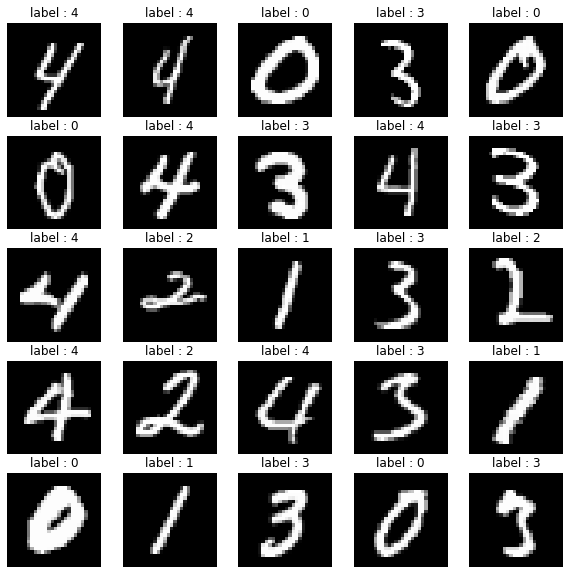

In [5]:
plot_img(x_train, y_train)

## Train model

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [8]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 33s 1ms/sample - loss: 1.6092 - accuracy: 0.2460 - val_loss: 1.6089 - val_accuracy: 0.3833
Epoch 2/10
30596/30596 [==============================] - 34s 1ms/sample - loss: 1.6089 - accuracy: 0.3035 - val_loss: 1.6087 - val_accuracy: 0.2526
Epoch 3/10
30596/30596 [==============================] - 33s 1ms/sample - loss: 1.6087 - accuracy: 0.3074 - val_loss: 1.6085 - val_accuracy: 0.2308
Epoch 4/10
30596/30596 [==============================] - 34s 1ms/sample - loss: 1.6085 - accuracy: 0.2943 - val_loss: 1.6083 - val_accuracy: 0.2232
Epoch 5/10
30596/30596 [==============================] - 34s 1ms/sample - loss: 1.6083 - accuracy: 0.2861 - val_loss: 1.6082 - val_accuracy: 0.2216
Epoch 6/10
30596/30596 [==============================] - 35s 1ms/sample - loss: 1.6082 - accuracy: 0.2778 - val_loss: 1.6080 - val_accuracy: 0.2216
Epoch 7/10
30596/30596 [==============================] -

In [10]:
if not "model" in os.listdir("./"):
    os.mkdir("model")
model.save("model/target_model.h5")

# Evaluate the model

In [11]:
target_model = load_model("model/target_model.h5")

### Make a punctual example

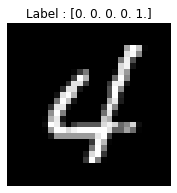

prediction : 1


In [12]:
img, label = pick_and_show_image(x_train, y_train)
print("prediction : {}".format(np.argmax(target_model.predict(np.expand_dims(np.expand_dims(img,0),-1)))))

### Evaluate on the whole test set

In [13]:
predictions_test = target_model.predict(x_test).argmax(axis=-1)
truth_test = y_test.argmax(axis=-1)
np.mean(predictions_test == truth_test)

0.22086008951157812